"""
**Multiple Linear Regression from Scratch**
---------------------------------------
Predicts student performance index based on study hours, sleep hours, and number of papers.
Implements Gradient Descent manually without sklearn.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Data Loading
data = pd.read_csv('/Student_Performance.csv')

#Data Cleaning
data = data.dropna()
data = data.drop_duplicates()

data

features = ['Hours Studied', 'Previous Scores','Sample Question Papers Practiced']
target = "Performance Index"

# #Loss Function (not needed for understanding)
# def loss_func(m, b, points, features):
#     X = points[features].values       # Shape: (n_samples, n_features)
#     y = points['target'].values       # Shape: (n_samples,)
#     y_pred = np.dot(X, m) + b          # Vectorized prediction
#     return np.mean((y - y_pred) ** 2)  # Mean squared error


#Gradient Descent Function
def gradient_descent(m_now, b_now, points, L):
  m_grad = [0] * len(m_now)
  b_grad = 0
  n = len(points)

  for i in range(n):
    x = points.iloc[i][features].values
    y = points.iloc[i][target]
    y_pred = sum([m_now[j] * x [j] for j in range(len(m_now))]) + b_now

    for j in range(len(m_now)):
      m_grad[j] += -(2/n) * x[j] * (y - y_pred)

    b_grad += -(2/n) * (y - y_pred)


  m = [m_now[j] - L * m_grad[j] for j in range(len(m_now))]
  b = b_now - b_grad*L
  return m, b

#implementation
m = [0] * len(features)
b = 0
epochs = 10

for i in range(epochs):
  m, b = gradient_descent(m, b, data, 0.0001)
  # if i % 10 == 0:
  #   print(f"Epoch {i}, Loss: {loss_func(m, b, data, features):.4f}")

m = [round(float(val), 4) for val in m]
b = round(float(b), 4)
print(m, b)


[0.0821, 0.7997, 0.0447] 0.009


<Figure size 1500x400 with 0 Axes>

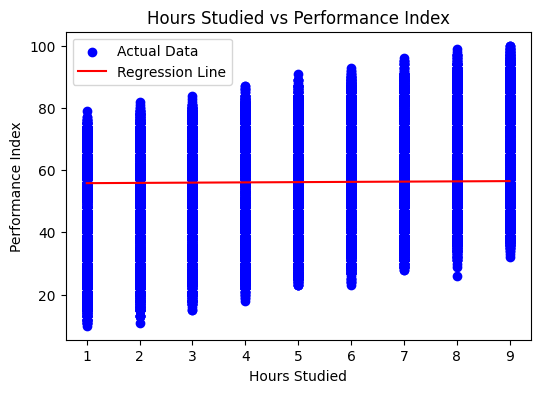

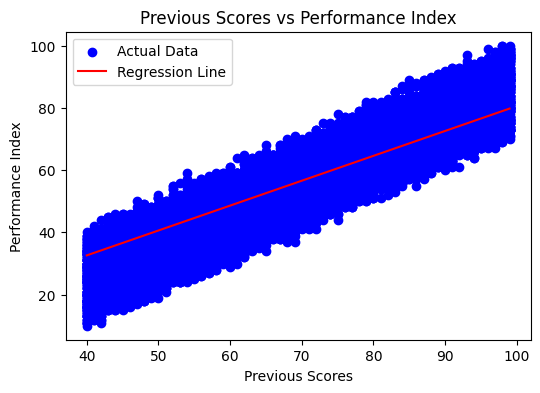

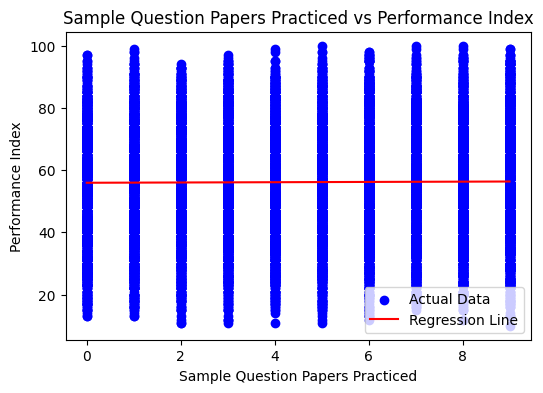

In [6]:
import matplotlib.pyplot as plt
import numpy as np

m = [0.0821, 0.7997, 0.0447]
b = 0.009

# Plot each scatter + regression line
plt.figure(figsize=(15, 4))

# Plot each feature separately
for i, feature in enumerate(features):
    plt.figure(figsize=(6, 4))

    # Scatter plot of actual data
    plt.scatter(data[feature], data[target], color='blue', label='Actual Data')

    # Regression line — vary only this feature, others fixed at mean
    x_vals = np.linspace(data[feature].min(), data[feature].max(), 100)
    other_features_mean = [data[f].mean() for f in features]
    y_vals = b + m[i] * x_vals + sum(
        m[j] * other_features_mean[j] for j in range(len(features)) if j != i
    )

    plt.plot(x_vals, y_vals, color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.legend()
    plt.show()

In [14]:
def predict(features_values, m, b):

  features = ['Hours Studied', 'Previous Scores','Sample Question Papers Practiced']
  m = [0.0821, 0.7997, 0.0447]
  b = 0.009
  return sum([m[j] * features_values[j] for j in range(len(m))]) + b

#Testing
new_student = [6, 85, 8]  #6 hours studied, 85 prev score, 8 hours sleep

predicted_index = predict(new_student, m, b)
print(f"Predicted Performance Index: {predicted_index:.4f}")


Predicted Performance Index: 68.8337
